In [ ]:
# Base -------------------------------------
import numpy as np
import pandas as pd
import scipy.stats as ss
import statsmodels.api as sm

# Viz ---------------------------------------
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Models ------------------------------------
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison 
from scipy.stats import mstats

In [ ]:
from google.colab import drive
drive.mount('IEXL')

Mounted at IEXL


In [ ]:
rates = pd.read_excel('/content/IEXL/MyDrive/IE XL/Datasets/new_car_interest_rate.xlsx')
rates.head()

,city,int_rate
0,Atlanta,13.75
1,Atlanta,13.75
2,Atlanta,13.50
3,Atlanta,13.50
4,Atlanta,13.00


En ANOVA tenemos como esquema de decisión

$$
H_0:\{\text{ todas las medias son iguales }\},\quad H_1:\{\text{ al menos una es diferente }\}
$$

Como ANOVA es un modelo lineal, existen una serie de condiciones que debemos satisfacer para poder usarlo:

 * Normalidad
 * Homoscedasticidad
 * Independencia

In [ ]:
# Tamaño muestral
n = rates.shape[0]
n

55

entendemos que este tamño muestral es pequeño ($<10\% N$) y por lo tanto podemos asumir independencia de las entradas en la base de datos.

In [ ]:
K = rates['city'].nunique()

6

In [ ]:
rates['city'].unique()

array(['Atlanta', 'Chicago', 'Houston', 'Memphis', 'New York',
       'Philadelphia'], dtype=object)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


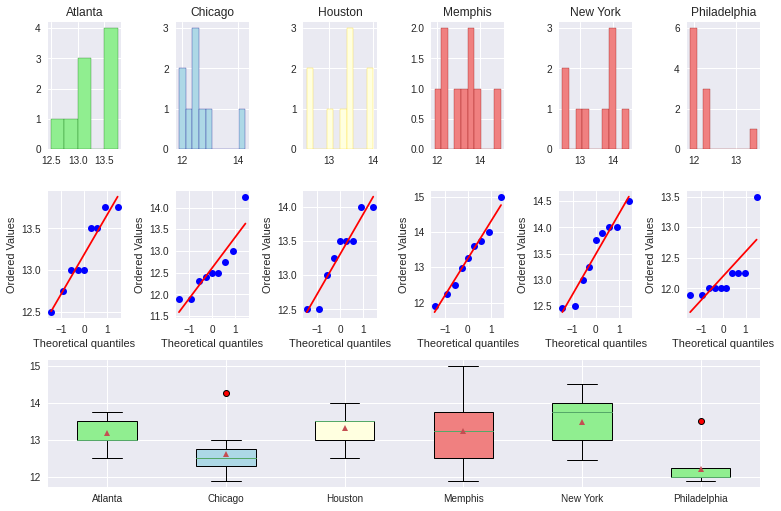

In [ ]:
'''
The following procedure is a bit long and could be simplified
using a for loop to generate the different graphs
'''

plt.figure(figsize = (12,8))

# Histograms ------------------------------------------
plt.subplot2grid((3,6), (0,0))
plt.hist(rates[rates['city']=='Atlanta']['int_rate'],
         color = 'lightgreen',
         ec = 'Darkgreen',
         bins = 5)
plt.title('Atlanta')

plt.subplot2grid((3,6), (0,1))
plt.hist(rates[rates['city']=='Chicago']['int_rate'],
         color = 'lightblue',
         ec = 'Darkblue')
plt.title('Chicago')

plt.subplot2grid((3,6), (0,2))
plt.hist(rates[rates['city']=='Houston']['int_rate'],
         color = 'lightyellow',
         ec = 'gold')
plt.title('Houston')

plt.subplot2grid((3,6), (0,3))
plt.hist(rates[rates['city']=='Memphis']['int_rate'],
         color = 'lightcoral',
         ec = 'Darkred')
plt.title('Memphis')

plt.subplot2grid((3,6), (0,4))
plt.hist(rates[rates['city']=='New York']['int_rate'],
         color = 'lightcoral',
         ec = 'Darkred')
plt.title('New York')

plt.subplot2grid((3,6), (0,5))
plt.hist(rates[rates['city']=='Philadelphia']['int_rate'],
         color = 'lightcoral',
         ec = 'Darkred')
plt.title('Philadelphia')


# QQplots ------------------------------------------
plt.subplot2grid((3,6), (1,0))
ss.probplot(rates[rates['city']=='Atlanta']['int_rate'],
            dist = 'norm',
            plot = plt)
plt.title('')

plt.subplot2grid((3,6), (1,1))
ss.probplot(rates[rates['city']=='Chicago']['int_rate'],
            dist = 'norm',
            plot = plt)
plt.title('')

plt.subplot2grid((3,6), (1,2))
ss.probplot(rates[rates['city']=='Houston']['int_rate'],
            dist = 'norm',
            plot = plt)
plt.title('')

plt.subplot2grid((3,6), (1,3))
ss.probplot(rates[rates['city']=='Memphis']['int_rate'],
            dist = 'norm',
            plot = plt)
plt.title('')

plt.subplot2grid((3,6), (1,4))
ss.probplot(rates[rates['city']=='New York']['int_rate'],
            dist = 'norm',
            plot = plt)
plt.title('')

plt.subplot2grid((3,6), (1,5))
ss.probplot(rates[rates['city']=='Philadelphia']['int_rate'],
            dist = 'norm',
            plot = plt)
plt.title('')

# Boxplots ------------------------------------------
plt.subplot2grid((3,6), (2,0), colspan=6)
bp =plt.boxplot([rates[rates['city']=='Atlanta']['int_rate'],
                 rates[rates['city']=='Chicago']['int_rate'],
                 rates[rates['city']=='Houston']['int_rate'],
                 rates[rates['city']=='Memphis']['int_rate'],
                 rates[rates['city']=='New York']['int_rate'],
                 rates[rates['city']=='Philadelphia']['int_rate']],
                showmeans = True,
                patch_artist = True,
                widths = 0.5,
                flierprops = dict(marker = 'o',
                                  markerfacecolor = 'red'),
                labels = ['Atlanta', 'Chicago', 'Houston', 'Memphis', 'New York', 'Philadelphia']
                )
colors = ['lightgreen', 'lightblue', 'lightyellow', 'lightcoral', 'lightgreen', 'lightgreen']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.tight_layout(rect = (0,0,0.9,0.9))
plt.show()

In [ ]:
modelo = ols('int_rate ~ C(city)', data = rates).fit()
table = sm.stats.anova_lm(modelo)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(city),5.0,11.505551,2.301110,5.181637,0.000679
Residual,49.0,21.760383,0.444089,NaN,NaN


como el valor p es $< 1\%$, existe evidencia a favor de la hipótesis nula y encontramos que al menos una de las poblaciones tiene una media de tipos de interés diferente al resto

In [ ]:
mc = MultiComparison(rates['int_rate'], rates['city'])

# Bonferroni --------
print('\nBonferroni')
print('-'*20)
print(mc.allpairtest(ss.ttest_ind, method = 'bonferroni', alpha = 0.01)[0])

# Tukey -------------
print('\nTukey')
print('-'*20)
print(mc.tukeyhsd())


Bonferroni
--------------------
Test Multiple Comparison ttest_ind 
FWER=0.01 method=bonferroni
alphacSidak=0.00, alphacBonf=0.001
 group1     group2      stat   pval  pval_corr reject
-----------------------------------------------------
 Atlanta      Chicago  2.0859 0.0534    0.8004  False
 Atlanta      Houston -0.4718 0.6434       1.0  False
 Atlanta      Memphis -0.1408 0.8898       1.0  False
 Atlanta     New York -1.0238 0.3211       1.0  False
 Atlanta Philadelphia  4.6574 0.0002    0.0034   True
 Chicago      Houston -2.3132 0.0343    0.5152  False
 Chicago      Memphis -1.5837 0.1328       1.0  False
 Chicago     New York -2.5895 0.0198    0.2964  False
 Chicago Philadelphia   1.479 0.1574       1.0  False
 Houston      Memphis  0.1673 0.8692       1.0  False
 Houston     New York  -0.583  0.568       1.0  False
 Houston Philadelphia  4.6533 0.0002    0.0034   True
 Memphis     New York -0.5948 0.5603       1.0  False
 Memphis Philadelphia  3.0234 0.0077    0.1149  False
New 